## Generating training and testing datasets (MNIST)

In [1]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt

path = 'mnist.pkl.gz'
f = gzip.open(path, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

x_train, y_train = training_data[0], training_data[1]
print (x_train.shape, y_train.shape)

x_test, y_test = test_data[0], test_data[1]
print (x_test.shape, y_test.shape)

x_traindnn = x_train
y_traindnn = y_train

x_testdnn = x_test
y_testdnn = y_test

(50000, 784) (50000,)
(10000, 784) (10000,)


## Classification using a CNN

In [2]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)

x_train shape (50000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)


C:\Users\Parth\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.2256 - acc: 0.9314
Epoch 2/10
50000/50000 [==============================] - 77s 2ms/step - loss: 0.0913 - acc: 0.9715
Epoch 3/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.0640 - acc: 0.9801
Epoch 4/10
50000/50000 [==============================] - 78s 2ms/step - loss: 0.0492 - acc: 0.9838
Epoch 5/10
50000/50000 [==============================] - 70s 1ms/step - loss: 0.0395 - acc: 0.9873
Epoch 6/10
50000/50000 [==============================] - 74s 1ms/step - loss: 0.0317 - acc: 0.9896
Epoch 7/10
50000/50000 [==============================] - 77s 2ms/step - loss: 0.0265 - acc: 0.9912
Epoch 8/10
50000/50000 [==============================] - 81s 2ms/step - loss: 0.0252 - acc: 0.9915
Epoch 9/10
50000/50000 [==============================] - 70s 1ms/step - loss: 0.0194 - acc: 0.9931
Epoch 10/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.0201 - acc: 0.9931

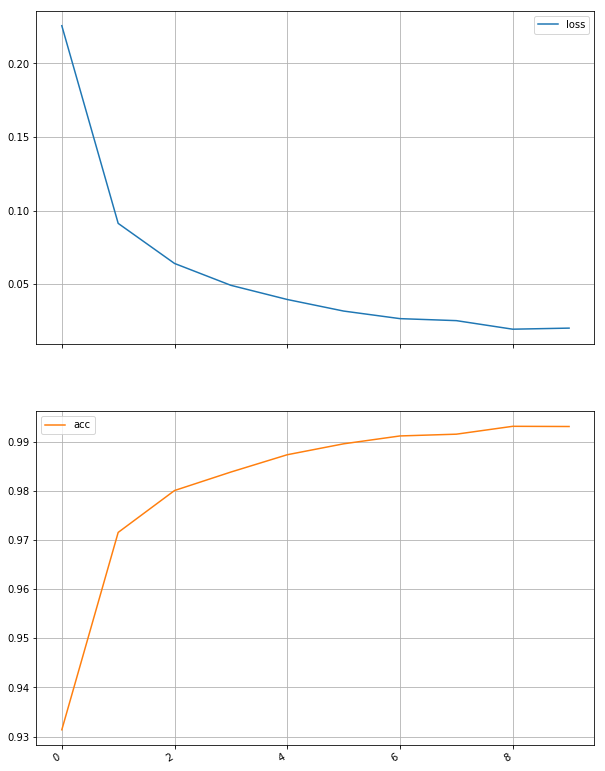

In [3]:
# Building the model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
%matplotlib inline
import pandas as pd

#creating a CNN
input_shape = (28, 28, 1)   
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
y_predicted = model.add(Dense(10,activation=tf.nn.softmax))

#Compiling the CNN
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=10)

#plot graphs
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))
plt.savefig('cnn.png')

## Testing the CNN model using MNIST and USPS datasets

In [4]:
#Testing using MNIST dataset
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred1 = np.empty((10000,0))
for i in range(10000):
    pred = model.predict(x_test[i].reshape(1, 28, 28, 1))
    pred = pred.argmax()
    pred1 = np.append(pred1, pred)

np.savetxt("cnn.csv", pred1, delimiter=",")
confusion = tf.confusion_matrix(labels=y_test, predictions=pred1)

with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(confusion,feed_dict=None, session=None))
 

(10000, 28, 28, 1)
(10000,)
10000/10000 [==============================] - 3s 317us/step
Test loss: 0.06231274970922204
Test accuracy: 0.9849
Confusion Matrix: 

 [[ 971    0    1    0    0    1    3    1    3    0]
 [   0 1125    3    0    0    0    4    2    1    0]
 [   1    1 1013    0    1    0    5    8    3    0]
 [   0    0    3  997    0    2    0    5    1    2]
 [   0    0    1    1  963    0    2    1    1   13]
 [   2    0    0    6    0  877    4    0    3    0]
 [   3    2    0    1    2    2  946    0    2    0]
 [   0    3    7    0    0    0    0 1010    1    7]
 [   2    0    2    2    0    0    3    3  958    4]
 [   1    1    0    2    3    4    1    5    3  989]]


In [5]:
#Testing using USPS dataset

from PIL import Image
import os
import numpy as np

#USPS data preprocessing
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []
USPSMatNew  = []
USPSTarNew  = []


for j in range(0,10):
    #print(j)
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((20, 20))
            imgData = (255-np.array(img.getdata()))/255
            USPSMat.append(imgData)
            USPSTar.append(j)
            new_im = Image.new("P", (28,28), (255))
            new_im.paste(img, (4,4))
            savedImg = new_im
            new_imData = (255-np.array(new_im.getdata()))/255
            USPSMatNew.append(new_imData)
            USPSTarNew.append(j)
usps_data = np.array(USPSMatNew) 
usps_lables = np.array(USPSTarNew)
usps_data = usps_data.reshape(usps_data.shape[0], 28, 28, 1)

#Testing using USPS data

score = model.evaluate(usps_data, usps_lables)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred1 = np.empty((19999,0))
for i in range(19999):
    pred = model.predict(usps_data[i].reshape(1, 28, 28, 1))
    pred = pred.argmax()
    pred1 = np.append(pred1, pred)
np.savetxt("cnn_usps.csv", pred1, delimiter=",")
confusion = tf.confusion_matrix(labels=usps_lables, predictions=pred1)

with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(confusion,feed_dict=None, session=None))
 

19999/19999 [==============================] - 6s 317us/step
Test loss: 3.3960397548511976
Test accuracy: 0.4978248912594641
Confusion Matrix: 

 [[ 205    0   64   73  395   22   32   39   36 1134]
 [  46  294  271  133  420   15   78  438  196  109]
 [  29    4 1461  114   57   11   89   92   84   58]
 [   6    1   67 1551   13   66   50   35  130   81]
 [   8    0   68   68 1439    8   21   77  181  130]
 [  81    0  107  213   29 1027   43   54   59  387]
 [  64    0  216   34  327   18 1223    5   38   75]
 [  11    6   87  689   22   11    0  862  141  171]
 [  36    2  148  299   48  124   41   55  698  549]
 [   5    6   96  187   78   18    3  171  240 1196]]


## Classification using DNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2048)              1607680   
_________________________________________________________________
activation_1 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20490     
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
50000/50000 [==============================] - 101s 2ms/step - loss: 0.2061 - acc: 0.9372
Epoch 2/10
50000/50000 [=======

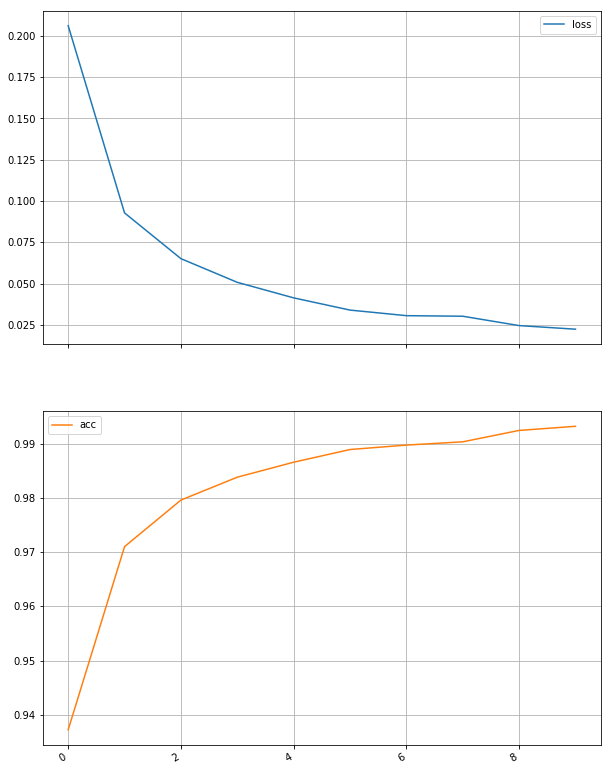

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
import numpy as np
from keras.utils import to_categorical


input_size = 784
drop_out = 0.2
first_dense_layer_nodes  = 2048
second_dense_layer_nodes = 10

def get_model():
    model = Sequential()
  
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_out)) 
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.summary()
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_dnn = get_model()
history = model_dnn.fit(x=x_traindnn,y=to_categorical(y_traindnn), epochs=10)

#plot graphs
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))
plt.savefig('dnn.png')

## Testing the DNN model using MNIST and USPS datasets

In [7]:
#Testing using MNIST dataset

score = model_dnn.evaluate(x_testdnn, to_categorical(y_testdnn))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_dnn = np.empty((10000,0))
for i in range(10000):
    pred = model_dnn.predict(x_testdnn[i].reshape(1, 784))
    for i in range(pred.shape[0]):
        datum = pred[i]
        preddec = np.argmax(pred[i])
    pred_dnn = np.append(pred_dnn, preddec)

print(pred_dnn)
print(y_test)
np.savetxt("dnn.csv", pred_dnn, delimiter=",")
confusion = tf.confusion_matrix(labels=y_test, predictions=pred_dnn)
with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(confusion,feed_dict=None, session=None))
 

10000/10000 [==============================] - 3s 315us/step
Test loss: 0.10122074194729075
Test accuracy: 0.9783
[7. 2. 1. ... 4. 5. 6.]
[7 2 1 ... 4 5 6]
Confusion Matrix: 

 [[ 973    1    1    0    1    1    1    1    1    0]
 [   0 1127    1    0    0    1    2    2    2    0]
 [  17    0  996    0    3    0    2    8    5    1]
 [   4    0    6  980    0    2    0    4    9    5]
 [   2    0    2    0  953    0    3    2    1   19]
 [   3    0    0    9    0  861    9    0    4    6]
 [   5    2    0    0    3    0  945    0    3    0]
 [   1    0    5    2    0    0    0 1011    2    7]
 [   9    0    1    3    1    6    1    3  948    2]
 [   4    3    0    3    3    1    0    6    0  989]]


In [10]:
#Testing using USPS dataset

from PIL import Image
import os
import numpy as np

#USPS data preprocessing
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []


for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
usps_data = np.array(USPSMat) 
usps_lables = np.array(USPSTar)

#Testing using USPS data

score = model_dnn.evaluate(usps_data, to_categorical(usps_lables))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_dnn = np.empty((19999,0))
for i in range(19999):
    pred = model_dnn.predict(usps_data[i].reshape(1, 784))
    for i in range(pred.shape[0]):
        datum = pred[i]
        preddec = np.argmax(pred[i])
    pred_dnn = np.append(pred_dnn, preddec)
np.savetxt("dnn_usps.csv", pred_dnn, delimiter=",")
confusion = tf.confusion_matrix(labels=usps_lables, predictions=pred_dnn)
with tf.Session():
   print('Confusion Matrix: \n\n', tf.Tensor.eval(confusion,feed_dict=None, session=None))

19999/19999 [==============================] - 6s 297us/step
Test loss: 5.231310031516438
Test accuracy: 0.4790739536932143
Confusion Matrix: 

 [[ 841    4  124   35  246   71  182   63  105  329]
 [  61  512  353   63  366  108   19  329  108   81]
 [ 166   12 1473   16   39   43  134   41   71    4]
 [  49   12  232 1256   21  319   17   24   53   17]
 [  20   48   42   11 1279   84   37  184  251   44]
 [ 109    0  189   99   36 1241  115   35  165   11]
 [ 187   16  243    8   42   72 1266   41   43   82]
 [  53  206  354  282   86   25   30  709  242   13]
 [ 233    7  140  257  155  211  177   92  697   31]
 [  12   55  120  256  275   21    5  554  395  307]]
